In [1]:
import pandas as pd
from prophet import Prophet
df=pd.read_csv("restaurant_visitors_adjusted.csv")
df

,id_,visit_datetime,reserve_datetime,reserve_visitors,visit_date
0,db80363d35f10926,2016-01-01 00:00:00,2016-01-01 01:00:00,5,2016-01-01
1,db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2,2016-01-02
2,db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4,2016-01-02
3,db80363d35f10926,2016-01-02 18:00:00,2016-01-02 14:00:00,2,2016-01-02
4,db80363d35f10926,2016-01-02 18:00:00,2016-01-02 02:00:00,3,2016-01-02
...,...,...,...,...,...
12157,3cad29d1a23209d2,2017-05-27 21:00:00,2017-02-09 18:00:00,3,2017-05-27
12158,1033310359ceeac1,2017-05-28 23:00:00,2017-04-15 22:00:00,2,2017-05-28
12159,1033310359ceeac1,2017-05-28 23:00:00,2017-04-18 17:00:00,2,2017-05-28
12160,1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8,2017-05-30


In [2]:
df.describe()

,reserve_visitors
count,12162.000000
mean,4.040701
std,4.141749
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,56.000000


In [3]:
df.isnull().sum()

id_                 0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
visit_date          0
dtype: int64

In [5]:
df.dtypes

id_                 object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
visit_date          object
dtype: object

In [6]:
df["visit_datetime"]=pd.to_datetime(df["visit_datetime"])

In [32]:
df=df[df["visit_datetime"]>pd.to_datetime("2016-10-01")]

In [33]:
data=df[["visit_datetime","reserve_visitors"]]
data.columns=["ds","y"]

In [34]:
m= Prophet(seasonality_mode="multiplicative")
m.add_seasonality(name='weekly_on_season',period=7, fourier_order=7, mode="additive")
m.fit(data)

22:08:41 - cmdstanpy - INFO - Chain [1] start processing
22:08:43 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = m.make_future_dataframe(periods=183)
future.tail()

,ds
1965,2017-11-26 21:00:00
1966,2017-11-27 21:00:00
1967,2017-11-28 21:00:00
1968,2017-11-29 21:00:00
1969,2017-11-30 21:00:00


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1965,2017-11-26 21:00:00,5.611282,0.432718,10.607135
1966,2017-11-27 21:00:00,6.505188,1.583588,11.377796
1967,2017-11-28 21:00:00,7.127718,1.649147,12.379432
1968,2017-11-29 21:00:00,6.269603,0.861780,11.356203
1969,2017-11-30 21:00:00,7.441242,2.313542,12.627104


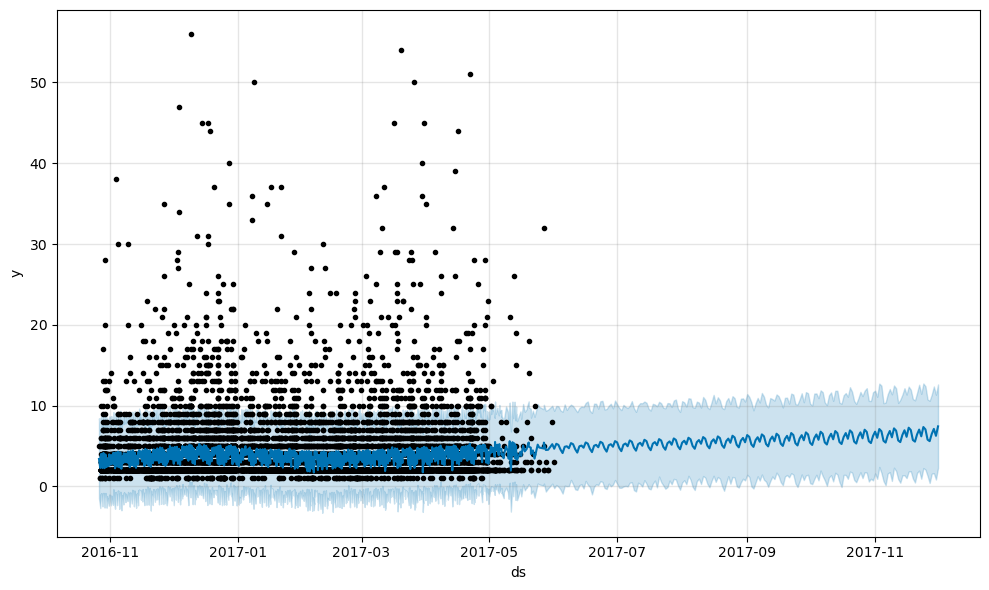

In [37]:
fig1 = m.plot(forecast)


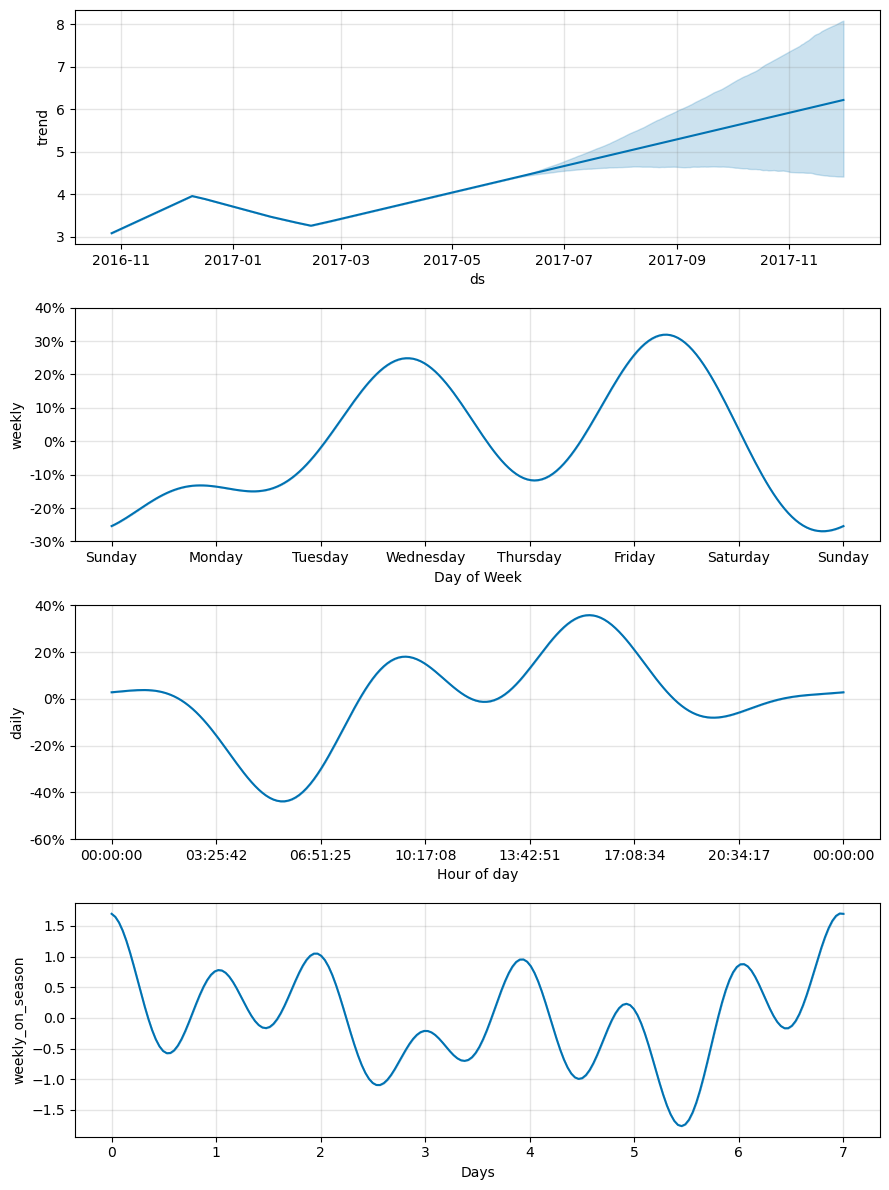

In [38]:
fig2 = m.plot_components(forecast)

In [39]:
final=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
final.columns=['visit_datetime','visitors','yhat_lower', 'yhat_upper']
final.to_csv('forecast_V1.csv')